In [41]:
# imports 
import numpy as np
from math import sqrt 
from pprint import pprint
from numpy import array
from scipy.io import arff
import pandas as pd
from time import time

In [42]:
# load data
df=pd.read_csv('diabetes.csv')  



df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
df.shape

(768, 9)

In [44]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [45]:
# data to values
df = df.values

In [46]:
# Extratrees Deep
import argparse
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/aloi.json")
gc = GCForest(config)

In [47]:
# train test 
from sklearn.cross_validation import train_test_split
y = df[:,8]
X = df[:,0:8]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
# number of class
len(np.unique(y_train))

2

In [49]:
# X_enc is the concatenated predict_proba result of DeepExtraTrees
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))
# Make data + estimators
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

# New data
X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

# predict  data + Es
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2019-01-12 10:56:53,347][cascade_classifier.fit_transform] X_groups_train.shape=[(537, 8)],y_train.shape=(537,),X_groups_test.shape=[(231, 8)],y_test.shape=(231,)
[ 2019-01-12 10:56:53,349][cascade_classifier.fit_transform] group_dims=[8]
[ 2019-01-12 10:56:53,350][cascade_classifier.fit_transform] group_starts=[0]
[ 2019-01-12 10:56:53,352][cascade_classifier.fit_transform] group_ends=[8]
[ 2019-01-12 10:56:53,354][cascade_classifier.fit_transform] X_train.shape=(537, 8),X_test.shape=(231, 8)
[ 2019-01-12 10:56:53,356][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(537, 8), X_cur_test.shape=(231, 8)
[ 2019-01-12 10:56:54,022][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=76.36%
[ 2019-01-12 10:56:54,772][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=74.55%
[ 2019-01-12 10:56:55,540][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_

Test Accuracy of DeepExtratTrees = 78.354978 %
[[139  18]
 [ 32  42]]


             precision    recall  f1-score   support

        0.0       0.81      0.89      0.85       157
        1.0       0.70      0.57      0.63        74

avg / total       0.78      0.78      0.78       231



[ 2019-01-12 10:57:03,646][cascade_classifier.fit_transform] X_groups_train.shape=[(537, 10)],y_train.shape=(537,),X_groups_test.shape=[(231, 10)],y_test.shape=(231,)
[ 2019-01-12 10:57:03,651][cascade_classifier.fit_transform] group_dims=[10]
[ 2019-01-12 10:57:03,653][cascade_classifier.fit_transform] group_starts=[0]
[ 2019-01-12 10:57:03,656][cascade_classifier.fit_transform] group_ends=[10]
[ 2019-01-12 10:57:03,658][cascade_classifier.fit_transform] X_train.shape=(537, 10),X_test.shape=(231, 10)
[ 2019-01-12 10:57:03,660][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(537, 10), X_cur_test.shape=(231, 10)
[ 2019-01-12 10:57:04,322][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=78.18%
[ 2019-01-12 10:57:05,115][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=74.55%
[ 2019-01-12 10:57:05,893][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_fold

Test Accuracy of DeepExtratTrees = 76.623377 %
[[139  18]
 [ 36  38]]


             precision    recall  f1-score   support

        0.0       0.79      0.89      0.84       157
        1.0       0.68      0.51      0.58        74

avg / total       0.76      0.77      0.76       231



In [50]:
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")


[ 2019-01-12 10:57:12,704][cascade_classifier.fit_transform] X_groups_train.shape=[(537, 10)],y_train.shape=(537,),X_groups_test.shape=[(231, 10)],y_test.shape=(231,)
[ 2019-01-12 10:57:12,706][cascade_classifier.fit_transform] group_dims=[10]
[ 2019-01-12 10:57:12,708][cascade_classifier.fit_transform] group_starts=[0]
[ 2019-01-12 10:57:12,709][cascade_classifier.fit_transform] group_ends=[10]
[ 2019-01-12 10:57:12,711][cascade_classifier.fit_transform] X_train.shape=(537, 10),X_test.shape=(231, 10)
[ 2019-01-12 10:57:12,712][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(537, 10), X_cur_test.shape=(231, 10)
[ 2019-01-12 10:57:13,376][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=74.55%
[ 2019-01-12 10:57:14,143][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=72.73%
[ 2019-01-12 10:57:14,892][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_fold

('Test Accuracy of DeepExtratTrees = 74.025974 %', 'Layer :', 0)
[[137  20]
 [ 40  34]]


             precision    recall  f1-score   support

        0.0       0.77      0.87      0.82       157
        1.0       0.63      0.46      0.53        74

avg / total       0.73      0.74      0.73       231

(' Time ', '7.666', ' seconds')


[ 2019-01-12 10:57:22,358][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=70.91%
[ 2019-01-12 10:57:23,070][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=70.91%
[ 2019-01-12 10:57:23,822][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=70.91%
[ 2019-01-12 10:57:24,572][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=74.07%
[ 2019-01-12 10:57:25,347][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=75.47%
[ 2019-01-12 10:57:26,125][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=88.68%
[ 2019-01-12 10:57:26,863][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=66.04%
[ 2019-01-12 10:57:27,596][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=66.04%


('Test Accuracy of DeepExtratTrees = 73.160173 %', 'Layer :', 1)
[[133  24]
 [ 38  36]]


             precision    recall  f1-score   support

        0.0       0.78      0.85      0.81       157
        1.0       0.60      0.49      0.54        74

avg / total       0.72      0.73      0.72       231

(' Time ', '7.723', ' seconds')


[ 2019-01-12 10:57:31,253][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=69.09%
[ 2019-01-12 10:57:32,030][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=70.91%
[ 2019-01-12 10:57:32,815][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=67.27%
[ 2019-01-12 10:57:33,620][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=74.07%
[ 2019-01-12 10:57:34,390][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=75.47%
[ 2019-01-12 10:57:35,161][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.23%
[ 2019-01-12 10:57:36,031][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=71.70%
[ 2019-01-12 10:57:36,883][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=66.04%


('Test Accuracy of DeepExtratTrees = 78.354978 %', 'Layer :', 2)
[[137  20]
 [ 30  44]]


             precision    recall  f1-score   support

        0.0       0.82      0.87      0.85       157
        1.0       0.69      0.59      0.64        74

avg / total       0.78      0.78      0.78       231

(' Time ', '8.049', ' seconds')


[ 2019-01-12 10:57:40,654][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=76.36%
[ 2019-01-12 10:57:41,473][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=72.73%
[ 2019-01-12 10:57:42,133][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=67.27%
[ 2019-01-12 10:57:42,753][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=70.37%
[ 2019-01-12 10:57:43,512][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=77.36%
[ 2019-01-12 10:57:44,260][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=88.68%
[ 2019-01-12 10:57:45,018][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=69.81%
[ 2019-01-12 10:57:45,828][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=66.04%


('Test Accuracy of DeepExtratTrees = 75.324675 %', 'Layer :', 3)
[[136  21]
 [ 36  38]]


             precision    recall  f1-score   support

        0.0       0.79      0.87      0.83       157
        1.0       0.64      0.51      0.57        74

avg / total       0.74      0.75      0.74       231

(' Time ', '7.545', ' seconds')


[ 2019-01-12 10:57:49,439][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=72.73%
[ 2019-01-12 10:57:50,208][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=74.55%
[ 2019-01-12 10:57:50,970][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=63.64%
[ 2019-01-12 10:57:51,712][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=74.07%
[ 2019-01-12 10:57:52,432][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=75.47%
[ 2019-01-12 10:57:53,259][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=90.57%
[ 2019-01-12 10:57:54,021][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=67.92%
[ 2019-01-12 10:57:54,776][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=69.81%


('Test Accuracy of DeepExtratTrees = 74.891775 %', 'Layer :', 4)
[[134  23]
 [ 35  39]]


             precision    recall  f1-score   support

        0.0       0.79      0.85      0.82       157
        1.0       0.63      0.53      0.57        74

avg / total       0.74      0.75      0.74       231

(' Time ', '7.502', ' seconds')


[ 2019-01-12 10:57:58,225][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=72.73%
[ 2019-01-12 10:57:58,969][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=72.73%
[ 2019-01-12 10:57:59,712][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=67.27%
[ 2019-01-12 10:58:00,432][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=70.37%
[ 2019-01-12 10:58:01,218][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=83.02%
[ 2019-01-12 10:58:01,982][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=88.68%
[ 2019-01-12 10:58:02,635][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=71.70%
[ 2019-01-12 10:58:03,465][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=73.58%


('Test Accuracy of DeepExtratTrees = 74.891775 %', 'Layer :', 5)
[[130  27]
 [ 31  43]]


             precision    recall  f1-score   support

        0.0       0.81      0.83      0.82       157
        1.0       0.61      0.58      0.60        74

avg / total       0.75      0.75      0.75       231

(' Time ', '7.601', ' seconds')


[ 2019-01-12 10:58:07,065][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=78.18%
[ 2019-01-12 10:58:07,826][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=76.36%
[ 2019-01-12 10:58:08,567][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=72.73%
[ 2019-01-12 10:58:09,365][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=72.22%
[ 2019-01-12 10:58:10,123][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=73.58%
[ 2019-01-12 10:58:10,872][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=88.68%
[ 2019-01-12 10:58:11,625][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=69.81%
[ 2019-01-12 10:58:12,378][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=66.04%


('Test Accuracy of DeepExtratTrees = 75.757576 %', 'Layer :', 6)
[[135  22]
 [ 34  40]]


             precision    recall  f1-score   support

        0.0       0.80      0.86      0.83       157
        1.0       0.65      0.54      0.59        74

avg / total       0.75      0.76      0.75       231

(' Time ', '7.685', ' seconds')


[ 2019-01-12 10:58:15,912][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=78.18%
[ 2019-01-12 10:58:16,669][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=74.55%
[ 2019-01-12 10:58:17,452][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=65.45%
[ 2019-01-12 10:58:18,230][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=75.93%
[ 2019-01-12 10:58:18,994][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=75.47%
[ 2019-01-12 10:58:19,768][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=83.02%
[ 2019-01-12 10:58:20,531][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=69.81%
[ 2019-01-12 10:58:21,311][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=64.15%


('Test Accuracy of DeepExtratTrees = 74.458874 %', 'Layer :', 7)
[[133  24]
 [ 35  39]]


             precision    recall  f1-score   support

        0.0       0.79      0.85      0.82       157
        1.0       0.62      0.53      0.57        74

avg / total       0.74      0.74      0.74       231

(' Time ', '7.601', ' seconds')


[ 2019-01-12 10:58:24,871][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=81.82%
[ 2019-01-12 10:58:25,506][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=74.55%
[ 2019-01-12 10:58:26,258][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=65.45%
[ 2019-01-12 10:58:26,998][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=68.52%
[ 2019-01-12 10:58:27,770][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=66.04%
[ 2019-01-12 10:58:28,543][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=83.02%
[ 2019-01-12 10:58:29,267][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=69.81%
[ 2019-01-12 10:58:30,001][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=64.15%


('Test Accuracy of DeepExtratTrees = 74.458874 %', 'Layer :', 8)
[[136  21]
 [ 38  36]]


             precision    recall  f1-score   support

        0.0       0.78      0.87      0.82       157
        1.0       0.63      0.49      0.55        74

avg / total       0.73      0.74      0.73       231

(' Time ', '7.408', ' seconds')


[ 2019-01-12 10:58:33,587][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=76.36%
[ 2019-01-12 10:58:34,331][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=63.64%
[ 2019-01-12 10:58:35,090][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=67.27%
[ 2019-01-12 10:58:35,857][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=68.52%
[ 2019-01-12 10:58:36,597][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=73.58%
[ 2019-01-12 10:58:37,385][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=84.91%
[ 2019-01-12 10:58:38,143][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=66.04%
[ 2019-01-12 10:58:38,920][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=67.92%


('Test Accuracy of DeepExtratTrees = 74.891775 %', 'Layer :', 9)
[[130  27]
 [ 31  43]]


             precision    recall  f1-score   support

        0.0       0.81      0.83      0.82       157
        1.0       0.61      0.58      0.60        74

avg / total       0.75      0.75      0.75       231

(' Time ', '7.758', ' seconds')


[ 2019-01-12 10:58:42,612][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=78.18%
[ 2019-01-12 10:58:43,385][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=74.55%
[ 2019-01-12 10:58:44,157][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=63.64%
[ 2019-01-12 10:58:44,915][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=72.22%
[ 2019-01-12 10:58:45,654][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=71.70%
[ 2019-01-12 10:58:46,391][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=84.91%
[ 2019-01-12 10:58:47,146][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=66.04%
[ 2019-01-12 10:58:47,905][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=62.26%


('Test Accuracy of DeepExtratTrees = 76.623377 %', 'Layer :', 10)
[[141  16]
 [ 38  36]]


             precision    recall  f1-score   support

        0.0       0.79      0.90      0.84       157
        1.0       0.69      0.49      0.57        74

avg / total       0.76      0.77      0.75       231

(' Time ', '7.69', ' seconds')


[ 2019-01-12 10:58:51,622][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=76.36%
[ 2019-01-12 10:58:52,382][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=76.36%
[ 2019-01-12 10:58:53,153][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=63.64%
[ 2019-01-12 10:58:53,916][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=74.07%
[ 2019-01-12 10:58:54,706][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=79.25%
[ 2019-01-12 10:58:55,475][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=86.79%
[ 2019-01-12 10:58:56,238][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=67.92%
[ 2019-01-12 10:58:56,978][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=66.04%


('Test Accuracy of DeepExtratTrees = 74.891775 %', 'Layer :', 11)
[[135  22]
 [ 36  38]]


             precision    recall  f1-score   support

        0.0       0.79      0.86      0.82       157
        1.0       0.63      0.51      0.57        74

avg / total       0.74      0.75      0.74       231

(' Time ', '7.741', ' seconds')


[ 2019-01-12 10:59:00,640][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=80.00%
[ 2019-01-12 10:59:01,271][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=76.36%
[ 2019-01-12 10:59:02,030][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=67.27%
[ 2019-01-12 10:59:02,773][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=72.22%
[ 2019-01-12 10:59:03,516][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=75.47%
[ 2019-01-12 10:59:04,275][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=88.68%
[ 2019-01-12 10:59:05,024][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=73.58%
[ 2019-01-12 10:59:05,803][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=67.92%


('Test Accuracy of DeepExtratTrees = 75.757576 %', 'Layer :', 12)
[[134  23]
 [ 33  41]]


             precision    recall  f1-score   support

        0.0       0.80      0.85      0.83       157
        1.0       0.64      0.55      0.59        74

avg / total       0.75      0.76      0.75       231

(' Time ', '7.434', ' seconds')


[ 2019-01-12 10:59:09,375][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=76.36%
[ 2019-01-12 10:59:10,128][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=70.91%
[ 2019-01-12 10:59:10,891][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=60.00%
[ 2019-01-12 10:59:11,642][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=74.07%
[ 2019-01-12 10:59:12,432][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=73.58%
[ 2019-01-12 10:59:13,190][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=84.91%
[ 2019-01-12 10:59:14,007][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=66.04%
[ 2019-01-12 10:59:14,774][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=64.15%


('Test Accuracy of DeepExtratTrees = 77.056277 %', 'Layer :', 13)
[[137  20]
 [ 33  41]]


             precision    recall  f1-score   support

        0.0       0.81      0.87      0.84       157
        1.0       0.67      0.55      0.61        74

avg / total       0.76      0.77      0.76       231

(' Time ', '7.789', ' seconds')


[ 2019-01-12 10:59:18,376][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=76.36%
[ 2019-01-12 10:59:19,201][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=74.55%
[ 2019-01-12 10:59:20,091][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=65.45%
[ 2019-01-12 10:59:20,935][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=74.07%
[ 2019-01-12 10:59:21,787][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=77.36%
[ 2019-01-12 10:59:22,723][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=83.02%
[ 2019-01-12 10:59:23,587][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=67.92%
[ 2019-01-12 10:59:24,493][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=67.92%


('Test Accuracy of DeepExtratTrees = 74.891775 %', 'Layer :', 14)
[[135  22]
 [ 36  38]]


             precision    recall  f1-score   support

        0.0       0.79      0.86      0.82       157
        1.0       0.63      0.51      0.57        74

avg / total       0.74      0.75      0.74       231

(' Time ', '8.667', ' seconds')


[ 2019-01-12 10:59:28,319][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=78.18%
[ 2019-01-12 10:59:29,105][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=67.27%
[ 2019-01-12 10:59:29,856][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=67.27%
[ 2019-01-12 10:59:30,609][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=72.22%
[ 2019-01-12 10:59:31,322][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=75.47%
[ 2019-01-12 10:59:32,124][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=83.02%
[ 2019-01-12 10:59:32,858][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=67.92%
[ 2019-01-12 10:59:33,620][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=67.92%


('Test Accuracy of DeepExtratTrees = 79.653680 %', 'Layer :', 15)
[[142  15]
 [ 32  42]]


             precision    recall  f1-score   support

        0.0       0.82      0.90      0.86       157
        1.0       0.74      0.57      0.64        74

avg / total       0.79      0.80      0.79       231

(' Time ', '7.869', ' seconds')


[ 2019-01-12 10:59:37,458][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=72.73%
[ 2019-01-12 10:59:38,308][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=76.36%
[ 2019-01-12 10:59:39,046][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=58.18%
[ 2019-01-12 10:59:39,784][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=72.22%
[ 2019-01-12 10:59:40,568][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=83.02%
[ 2019-01-12 10:59:41,304][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=88.68%
[ 2019-01-12 10:59:42,037][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=69.81%
[ 2019-01-12 10:59:42,823][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=66.04%


('Test Accuracy of DeepExtratTrees = 74.458874 %', 'Layer :', 16)
[[134  23]
 [ 36  38]]


             precision    recall  f1-score   support

        0.0       0.79      0.85      0.82       157
        1.0       0.62      0.51      0.56        74

avg / total       0.74      0.74      0.74       231

(' Time ', '7.798', ' seconds')


[ 2019-01-12 10:59:46,444][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=72.73%
[ 2019-01-12 10:59:47,218][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=70.91%
[ 2019-01-12 10:59:47,967][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=65.45%
[ 2019-01-12 10:59:48,780][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=72.22%
[ 2019-01-12 10:59:49,539][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=75.47%
[ 2019-01-12 10:59:50,299][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=86.79%
[ 2019-01-12 10:59:51,056][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=73.58%
[ 2019-01-12 10:59:51,819][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=69.81%


('Test Accuracy of DeepExtratTrees = 77.489177 %', 'Layer :', 17)
[[139  18]
 [ 34  40]]


             precision    recall  f1-score   support

        0.0       0.80      0.89      0.84       157
        1.0       0.69      0.54      0.61        74

avg / total       0.77      0.77      0.77       231

(' Time ', '7.742', ' seconds')


[ 2019-01-12 10:59:55,512][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=80.00%
[ 2019-01-12 10:59:56,263][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=72.73%
[ 2019-01-12 10:59:57,056][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=67.27%
[ 2019-01-12 10:59:57,800][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=70.37%
[ 2019-01-12 10:59:58,561][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=71.70%
[ 2019-01-12 10:59:59,309][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=86.79%
[ 2019-01-12 11:00:00,078][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=69.81%
[ 2019-01-12 11:00:00,923][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=67.92%


('Test Accuracy of DeepExtratTrees = 76.623377 %', 'Layer :', 18)
[[136  21]
 [ 33  41]]


             precision    recall  f1-score   support

        0.0       0.80      0.87      0.83       157
        1.0       0.66      0.55      0.60        74

avg / total       0.76      0.77      0.76       231

(' Time ', '7.745', ' seconds')


[ 2019-01-12 11:00:04,503][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=76.36%
[ 2019-01-12 11:00:05,256][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=72.73%
[ 2019-01-12 11:00:06,001][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=65.45%
[ 2019-01-12 11:00:06,760][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=74.07%
[ 2019-01-12 11:00:07,539][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=77.36%
[ 2019-01-12 11:00:08,329][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=92.45%
[ 2019-01-12 11:00:09,090][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=67.92%
[ 2019-01-12 11:00:09,856][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=66.04%


('Test Accuracy of DeepExtratTrees = 78.354978 %', 'Layer :', 19)
[[140  17]
 [ 33  41]]


             precision    recall  f1-score   support

        0.0       0.81      0.89      0.85       157
        1.0       0.71      0.55      0.62        74

avg / total       0.78      0.78      0.78       231

(' Time ', '7.692', ' seconds')


('Opt_layer_num =', 15, ' Accuracy =', 79.65, 'Time =', 123.73)


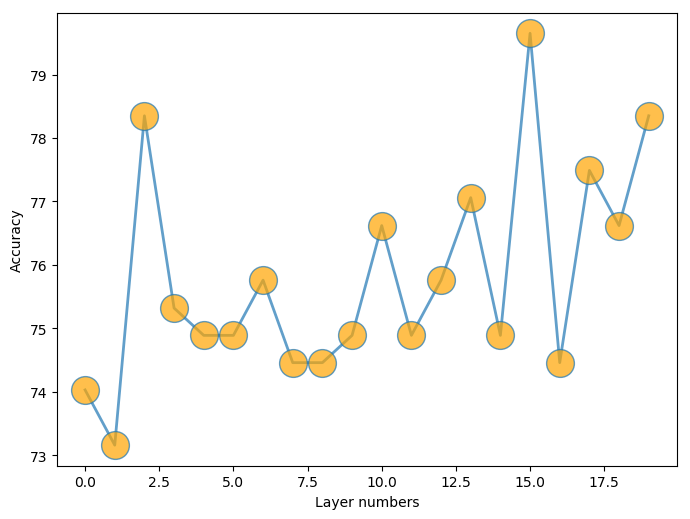

In [51]:
print ("Opt_layer_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Layer numbers')
plt.show()

In [52]:
Accuracy

[74.03,
 73.16,
 78.35,
 75.32,
 74.89,
 74.89,
 75.76,
 74.46,
 74.46,
 74.89,
 76.62,
 74.89,
 75.76,
 77.06,
 74.89,
 79.65,
 74.46,
 77.49,
 76.62,
 78.35]